<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/content/salaries.csv")
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
labelEncoder = LabelEncoder()
cols =  ["company", "job", "degree"]

for col in cols:
  df[col] = labelEncoder.fit_transform(df[col])

df.head()

,company,job,degree,salary_more_than_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [8]:
x = df.drop("salary_more_than_100k", axis=1)

In [9]:
y = df["salary_more_than_100k"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state =40)

In [13]:
decisionTree =DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
print("accuracy", decisionTree.score(x_test, y_test))

accuracy 1.0


In [15]:
y_predict = decisionTree.predict(x_test)
cm = confusion_matrix(y_test, y_predict)

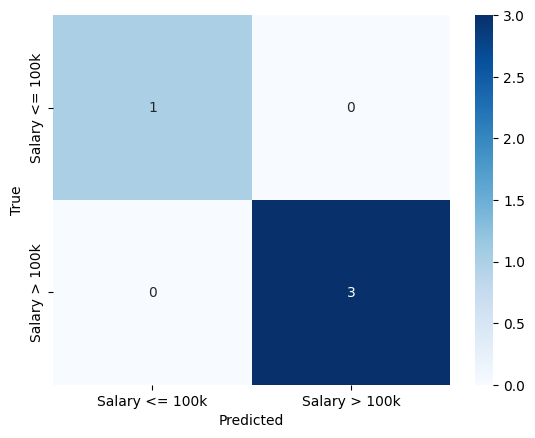

In [16]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Salary <= 100k', 'Salary > 100k'], yticklabels=['Salary <= 100k', 'Salary > 100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

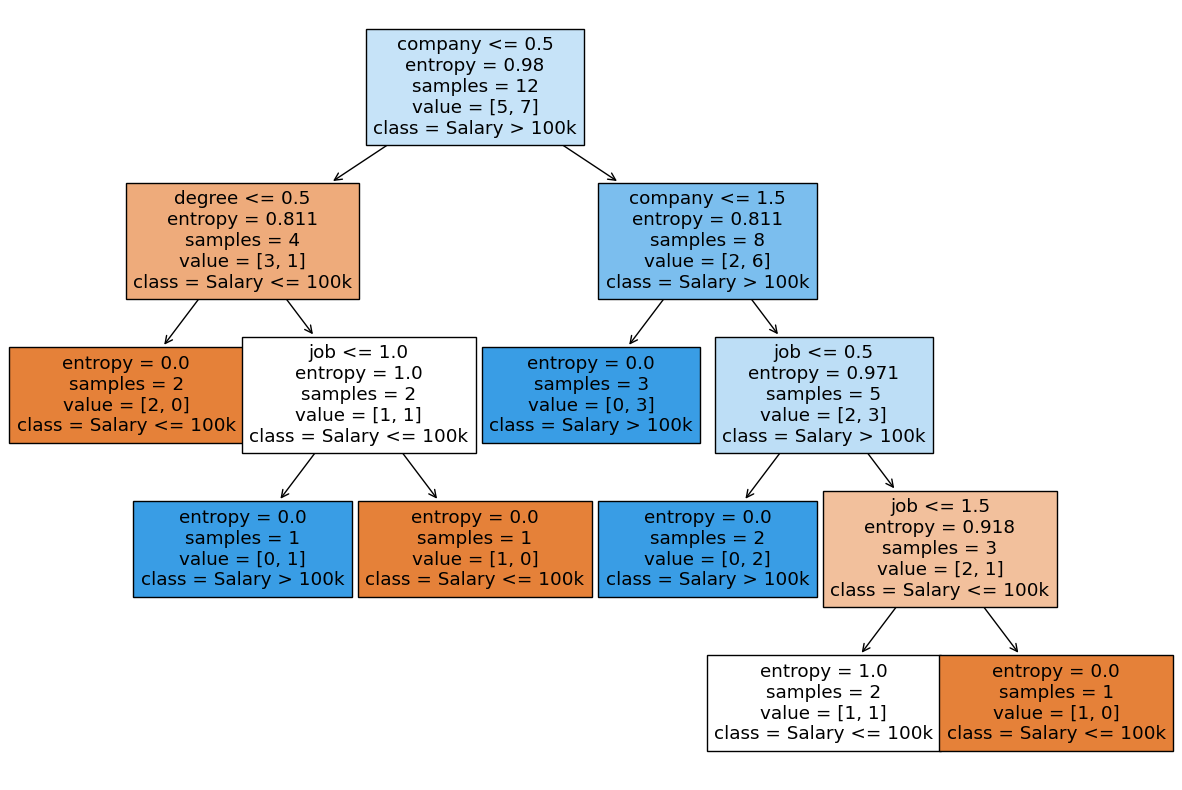

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(decisionTree, filled=True, feature_names=list(x.columns), class_names=['Salary <= 100k', 'Salary > 100k'])
plt.show()